1)
**Gradient Descent:**  
$$\Theta_j = \Theta_j - \alpha \frac{\partial}{\partial \Theta_j} J(\Theta)$$  
where α is the learning rate and J(Θ) is the cost function.

The **cost function** is:  
$$J(\Theta) = \frac{1}{2} \sum_{i=1}^{n} (h_\Theta(x^{(i)}) - y^{(i)})^2$$

We want the partial derivative of J(Θ) with respect to Θ, so we apply the chain rule:  
$$\frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{2}{2} \cdot (h_\Theta(x) - y) \cdot \frac{\partial}{\partial \Theta_j} \left( \sum_{i=1}^{n} (h_\Theta(x^{(i)}) - y^{(i)}) \right)$$  
$$\frac{\partial J(\Theta)}{\partial \Theta_j} = (h_\Theta(x) - y) \cdot x_j$$

Then:  
$$ \Theta_j = \Theta_j - \alpha (h_\Theta(x) - y) \cdot x_j$$

---

**Sigmoid Function:**  
The sigmoid function is:  
$$\sigma(a) = \frac{1}{1 + e^{-a}}$$
Its derivative is:  
$$\sigma'(a) = \sigma(a) \cdot (1 - \sigma(a))$$

---

We have two layers, so for the forward pass we do:
      $$Z_1 = X*W_1  $$
      $$A_1 = sigmoid(Z_1)$$
      $$Z_2 = A_1 * W_2$$
      $$A_2 = Z_2 $$      
Where A2 is the output of the output layer with linear activation function.

For the backpropagation pass we do:
$$\frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial A_2} *\frac{\partial A_2}{\partial Z_2} * \frac{\partial Z_2}{\partial W_2} $$
Where:
  $$ \frac{\partial L}{\partial A_2} = (A_2 -y)$$
  $$ \frac{\partial A_2}{\partial Z_2} = A_2'=1 $$
  $$ \frac{\partial Z_2}{\partial W_2} = A_1 $$
Then:
$$\frac{\partial L}{\partial W_2} = (A_2 -y)*1*A_1$$
Now for W2:
$$\frac{\partial L}{\partial W_1}= \frac{\partial L}{\partial A_2} *\frac{\partial A_2}{\partial Z_2}*\frac{\partial Z_2}{\partial A_1}*\frac{\partial A_1}{\partial Z_1}*\frac{\partial Z_1}{\partial W_1}$$
Where the first two terms are known and the rest are:
$$\frac{\partial Z_2}{\partial A_1}=W_2$$
$$\frac{\partial A_1}{\partial Z_1}=A_1'$$
$$\frac{\partial Z_1}{\partial W_1}=X$$
Then:
$$\frac{\partial L}{\partial W_1}=(A_2 -y)*1*W_2*A_1'*X$$
Finally to update the weigths we do:
$$W_2 = W_2 - alpha * \frac{\partial L}{\partial W_2}$$
$$W_1 = W_1 - alpha * \frac{\partial L}{\partial W_1}$$

The difference with an update rule for binary classification will be the Loss function, which instead of being MSE it will be cross entropy, for example. The output instead of being a continues value will be a probability between 0 and 1.



In [190]:
import numpy as np

X_train_raw = np.loadtxt("X_train.csv")
Y_train = np.loadtxt("Y_train.csv")
X_test_raw = np.loadtxt("X_test.csv")
Y_test = np.loadtxt("Y_test.csv")

print(X_train_raw[1:5], Y_train[1:5])

def normalize(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    return (X - X_min) / (X_max - X_min)

# Normalize X_train and X_test
X_train = normalize(X_train_raw)
X_test = normalize(X_test_raw)

print(X_train[1:5], Y_train[1:5])


[[-0.39108897  1.74347695]
 [ 0.38603031  2.08401853]
 [ 0.75412143 -0.77204064]
 [-1.70608593 -1.15911942]] [121.19952851 144.96172544 -53.60851723 -80.78260693]
[[0.42477343 0.87335953]
 [0.56551832 0.95043826]
 [0.63218369 0.3039932 ]
 [0.18661294 0.21638116]] [121.19952851 144.96172544 -53.60851723 -80.78260693]


In [196]:
class NeuralNetwork:
  def __init__(self, input_size=2, hidden_size=2, output_size=1, alpha=0.0001):
    self.alpha = alpha  #learning rate
    self.input_size = input_size  # input features
    self.hidden_size = hidden_size  # nodes in the hidden layer
    self.output_size = output_size  # nodes in the output layer

     # Initialize weights

    self.W1 = np.random.randn(self.input_size + 1, self.hidden_size) * 0.01 #+1 for bias
    self.W2 = np.random.randn(self.hidden_size, self.output_size) * 0.01 # * 0.01 to start small



  def fit(self, X_train, Y_train, epochs=1000, activation_func ='sigmoid',early_stop = False, patience=15, regularization = False, l = 0.1):
    X_train = np.column_stack([np.ones(len(X_train)),X_train])
    Y_train = Y_train.reshape(-1, 1)
    cost = []
    patience_counter = 0 #number of epochs with the same loss
    if early_stop:
      cost_val = []
      best_val_mse = 1e10
      n = int(len(X_train)*0.2)
      X_validation = X_train[:n]
      Y_validation = Y_train[:n]
      X_train = X_train[n:]
      Y_train = Y_train[n:]
    for epoch in range(epochs):
      # Forward propagation
      Z1 = np.dot(X_train, self.W1)  # Input-to-hidden
      A1 = activation(Z1,activation_func)          # Activation of layer 1
      Z2 = np.dot(A1, self.W2)       # Hidden-to-output
      A2 = (Z2)      # Output layer

      # Backpropagation
      dL_dA2 = (A2-Y_train) # dL/dA2: error
      dA2_dZ2 = 1 # dA2/dZ2
      dZ2_dW2 = A1 # dZ2/dW2
      dL_dW2 = np.dot(dZ2_dW2.T, dL_dA2*dA2_dZ2) #dL/dW2


      dZ2_dA1 = self.W2 # dZ2/dA1
      dA1_dZ1 = d_activation(A1,activation_func) # dA1/dZ1
      dZ1_dW1 = X_train # dZ1/dW1
      dL_dA1 = np.dot(dL_dA2*dA2_dZ2, dZ2_dA1.T)

      dL_dW1 = np.dot(X_train.T, dL_dA1*dA1_dZ1)  # dL/dW1


      # Update weights
      if regularization:
        self.W1 -= self.alpha * (dL_dW1 + l * (self.W1))
        self.W2 -= self.alpha * (dL_dW2 + l * (self.W2))
        penalty = 0.5 * l * (np.sum(self.W1 ** 2) + np.sum(self.W2 ** 2))
        cost.append(np.mean(dL_dA2 ** 2)+ penalty)
      else:
        self.W2 -= self.alpha * dL_dW2
        self.W1 -= self.alpha * dL_dW1
        cost.append(np.mean(dL_dA2 ** 2))


      # Calculate the mean squared error
      if early_stop:
        y_pred = self.predict(X_validation,activation_func)
        val_mse = np.mean((Y_validation - y_pred) ** 2)
        if regularization:
          val_mse += penalty
        if round(val_mse,2) < round(best_val_mse,2): # If true the model keeps learning
          patience_counter = 0
          cost_val.append(val_mse)
          best_val_mse = val_mse
        else:
          patience_counter += 1
          cost_val.append(val_mse)
        if patience_counter >= patience:
          return cost, cost_val


    if early_stop:
      return cost, cost_val
    else:
      return cost

  def predict(self, X_test,activation_func='sigmoid'):
        # Add bias if needed
        if len(X_test[0]) != len(self.W1):
          X_test = np.column_stack([np.ones(len(X_test)), X_test])
        Z1 = np.dot(X_test, self.W1)
        A1 = activation(Z1,activation_func)
        Y_pred = np.dot(A1, self.W2)
        return Y_pred

  def get_MSE(self, Y_test, Y_pred):
        return np.mean((Y_test - Y_pred) ** 2)


def activation(x,activation_func = 'sigmoid'):
  if activation_func == 'sigmoid':
    return 1/(1+np.exp(-x))
  elif activation_func == 'linear':
    return x
  elif activation_func == 'relu':
    return np.maximum(0, x)

def d_activation(x,activation_func = 'sigmoid'):
  if activation_func == 'sigmoid':
    return x*(1-x)
  elif activation_func == 'linear':
    return 1
  elif activation_func == 'relu':
    return (x > 0).astype(float) #return 1 if x>0


In [192]:
#Forward propagation
#The weighted sum at each node is calculated using
nn = NeuralNetwork(alpha=0.0001)
np.random.seed(99)
cost = nn.fit(X_train,Y_train, epochs=3000,activation_func = 'sigmoid')

print(cost[2999])



2271.4769233025913


2-1) For the output layer we are using linear function, since we are doing a regression task a linear function avoids distortioning the output.

2-2) My output layer has one neuron because Y is only one value. So the single output is the single value we want to predict.

2-3) The MSE is 2271

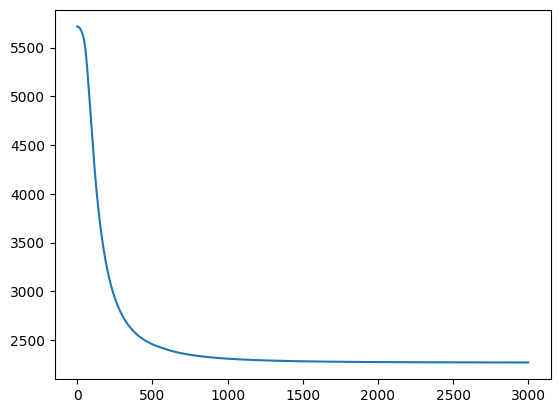

In [193]:
#2-4)
import matplotlib.pyplot as plt
plt.plot(cost)
plt.show()

2-5) In the following plot we can see that in learning rates over 0.01 the accuracy does not improve anymore. Probably, the step is too big.

<ipython-input-191-94ec0ebf1ac0>:99: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


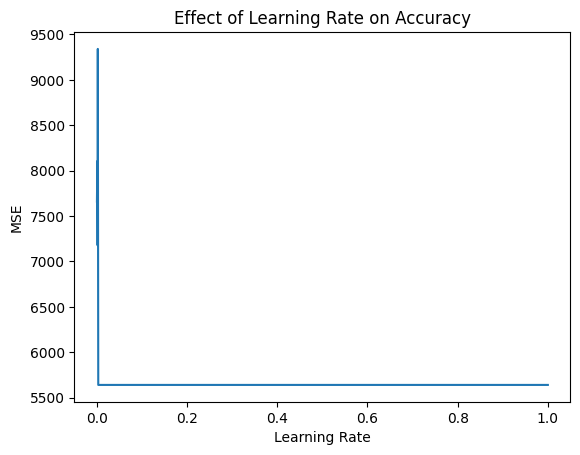

In [194]:
#2-5)
alphas = [0.0001, 0.001 , 0.0015 ,0.002, 0.003, 0.01 , 0.05, 0.1, 0.5, 1]

accuracy = []
for alpha in alphas:
  nn = NeuralNetwork(alpha=alpha)
  cost= nn.fit(X_train,Y_train, epochs=3000,activation_func = 'sigmoid')
  Y_pred = nn.predict(X_test,activation_func = 'sigmoid')
  accuracy.append(nn.get_MSE(Y_test, Y_pred))

plt.plot(alphas, accuracy)
plt.xlabel('Learning Rate')
plt.ylabel('MSE')
plt.title('Effect of Learning Rate on Accuracy')
plt.show()

2-6) In the plot we can see that 2 nodes is the best alternative. For more nodes it does not really improve. Since we are only changing the number of nodes we do not need to change the update rule.

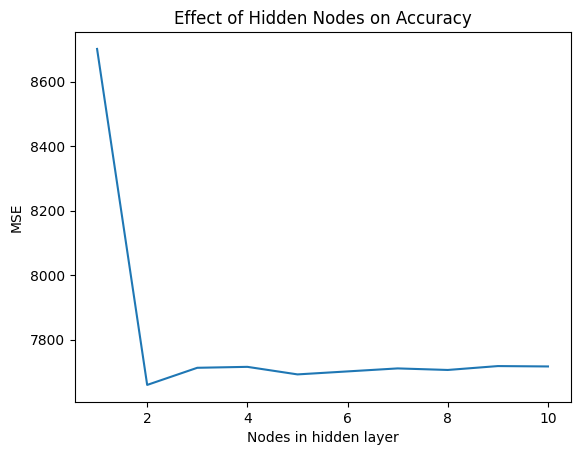

In [198]:
nodes_hidden = [1,2,3,4,5,7,8,9,10]
accuracy = []
for nodes in nodes_hidden:
  nn = NeuralNetwork(hidden_size=nodes)
  cost= nn.fit(X_train,Y_train, epochs=3000)
  Y_pred = nn.predict(X_test)
  accuracy.append(nn.get_MSE(Y_test, Y_pred))

plt.plot(nodes_hidden, accuracy)
plt.xlabel('Nodes in hidden layer')
plt.ylabel('MSE')
plt.title('Effect of Hidden Nodes on Accuracy')
plt.show()

We can see that our model follows the real values closely. However it is not capable of predicting negative values.

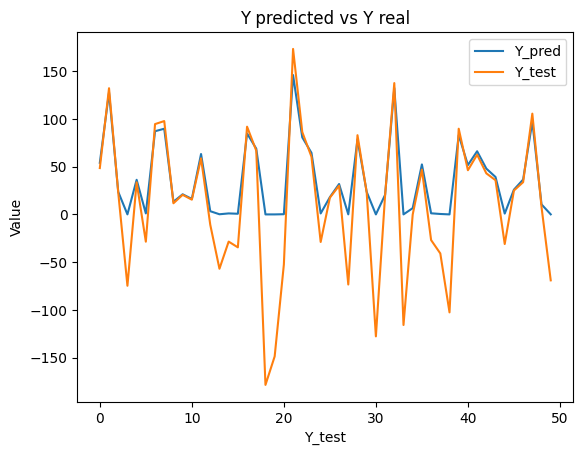

In [199]:
nn = NeuralNetwork(hidden_size=2)
cost= nn.fit(X_train,Y_train, epochs=3000,activation_func = 'sigmoid')
Y_pred = nn.predict(X_test,activation_func = 'sigmoid')

plt.plot(Y_pred)
plt.plot(Y_test)
plt.legend(['Y_pred', 'Y_test'])
plt.xlabel('Y_test')
plt.ylabel('Value')
plt.title('Y predicted vs Y real')
plt.show()

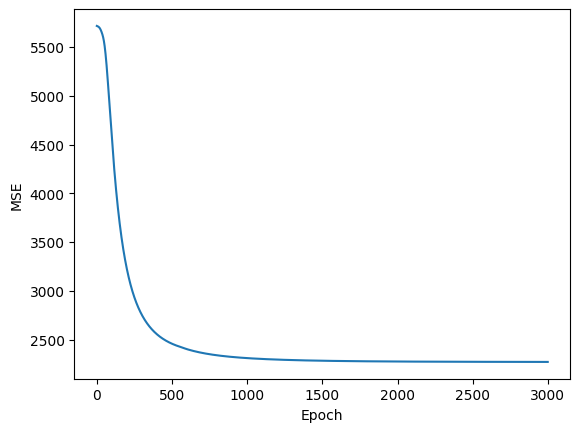

In [200]:
plt.plot(cost)

plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

2-7) Yes, we will need to change the update rule. We need to change A1, since is the activation fuction applied to Z, and dA1_dZ1 that is the derivative of the acivtion function. It was added in the fit function as a new parameter to set 'activation_func' to be set as sigmoid, relu or linear.

After plotting we can see that linear activation has the best performance. Relu would not be a good idea since our Y data has negative values that relu would overlook. However, relu still got a better performance than sigmoid. Also it was interesting to note that linear activation required a much smaller step than the other two.


In [201]:
nn = NeuralNetwork(hidden_size=2)
cost_sig= nn.fit(X_train,Y_train, epochs=3000,activation_func = 'sigmoid')
Y_pred_sig = nn.predict(X_test,activation_func = 'sigmoid')

nn = NeuralNetwork(hidden_size=2,alpha=0.00001)
cost_linear= nn.fit(X_train,Y_train, epochs=3000,activation_func = 'linear')
Y_pred_linear = nn.predict(X_test,activation_func = 'linear')

nn = NeuralNetwork(hidden_size=2)
cost_relu = nn.fit(X_train,Y_train, epochs=3000,activation_func = 'relu')
Y_pred_relu = nn.predict(X_test,activation_func = 'relu')


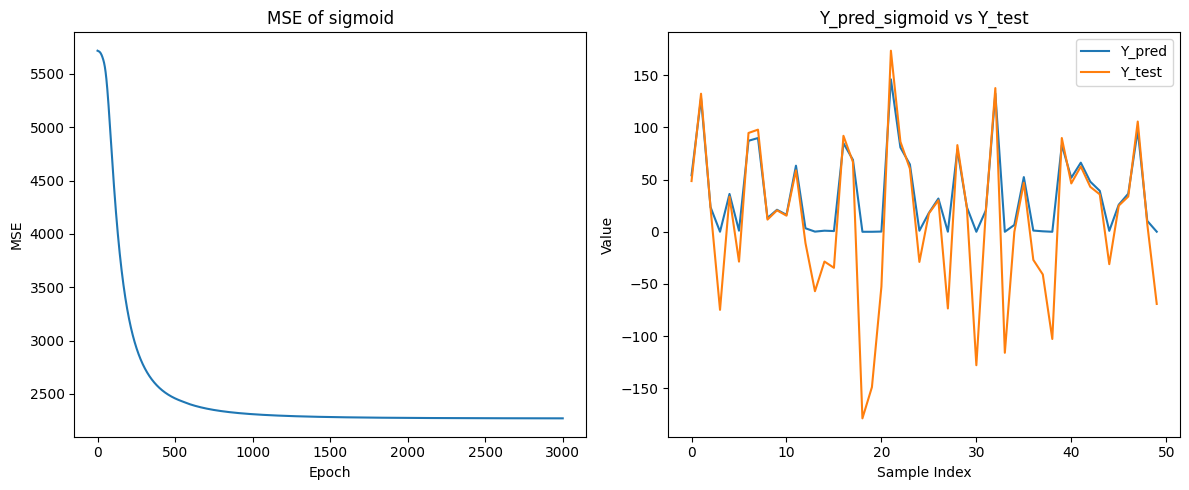

In [202]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(cost_sig)
ax1.set_ylabel('MSE')
ax1.set_xlabel('Epoch')
ax1.set_title('MSE of sigmoid')

ax2.plot(Y_pred_sig, label='Y_pred')
ax2.plot(Y_test, label='Y_test')
ax2.legend()
ax2.set_xlabel('Sample Index')
ax2.set_ylabel('Value')
ax2.set_title('Y_pred_sigmoid vs Y_test')

plt.tight_layout()
plt.show()

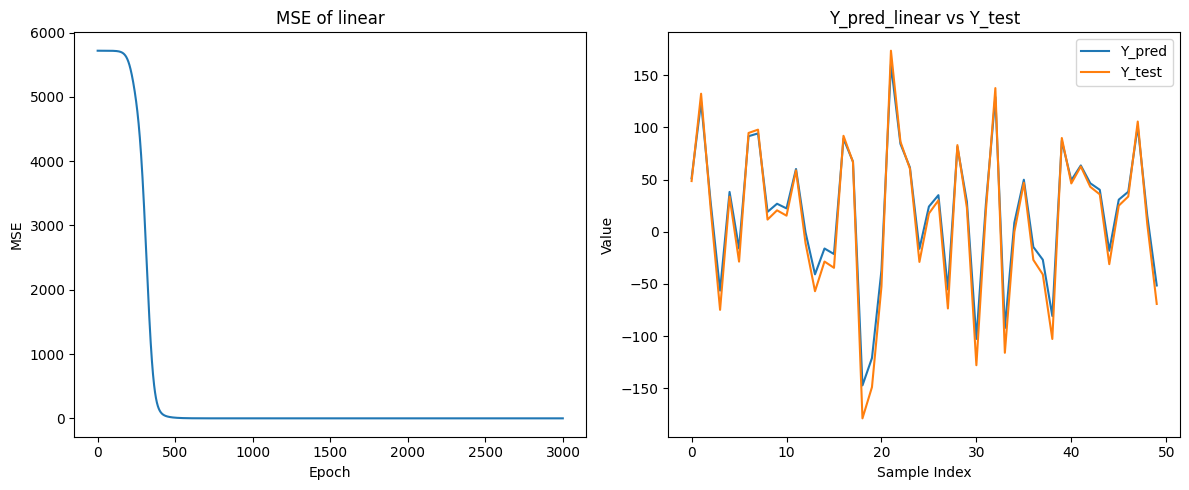

In [203]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(cost_linear)
ax1.set_ylabel('MSE')
ax1.set_xlabel('Epoch')
ax1.set_title('MSE of linear')

ax2.plot(Y_pred_linear, label='Y_pred')
ax2.plot(Y_test, label='Y_test')
ax2.legend()
ax2.set_xlabel('Sample Index')
ax2.set_ylabel('Value')
ax2.set_title('Y_pred_linear vs Y_test')

plt.tight_layout()
plt.show()

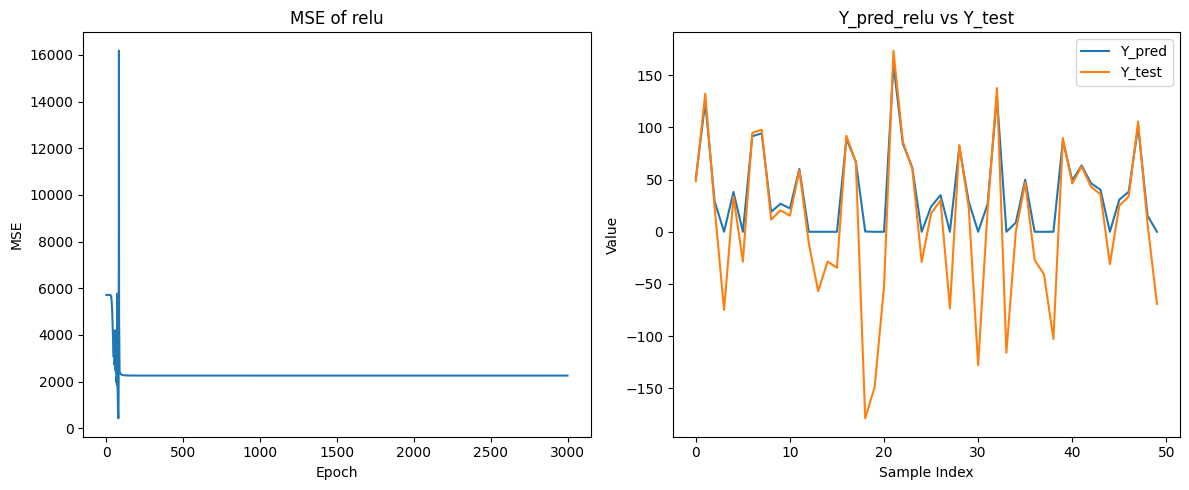

In [204]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(cost_relu)
ax1.set_ylabel('MSE')
ax1.set_xlabel('Epoch')
ax1.set_title('MSE of relu')

ax2.plot(Y_pred_relu, label='Y_pred')
ax2.plot(Y_test, label='Y_test')
ax2.legend()
ax2.set_xlabel('Sample Index')
ax2.set_ylabel('Value')
ax2.set_title('Y_pred_relu vs Y_test')

plt.tight_layout()
plt.show()

2-8) it was added in the fit function two parameters, early_stop set by default to False and patience, set by default to 15. Patience is the number of epochs where the loss has not beat the best value.

In the first plot we can see the loss at different patience values. As we continue increasing the patience the validation loss stops increasing.

In the second plot we used linear activation and we can see that the training and validation loss go together very closely, and it had an early stopping at 436.


In the third plot, using sigmoid activation, we can see that the early stop was at 5689 epochs and that the validation MSE is lower.

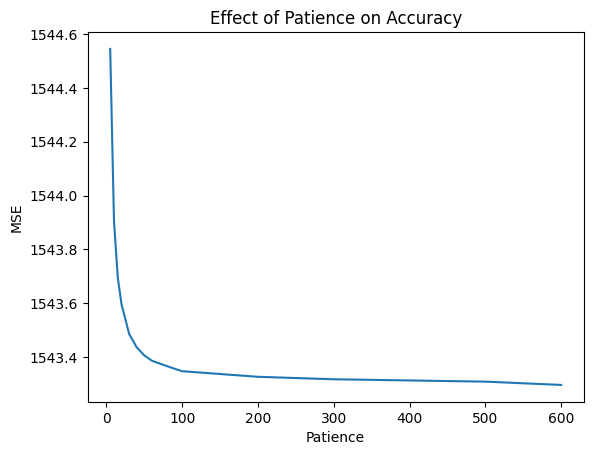

In [205]:
#2-8)

nn = NeuralNetwork(hidden_size=2)

patiences = [5,10,15,20,30,40,50,60,70,80,90,100,200,300,500, 600]
loss = []
for patience in patiences:
  cost_train, cost_val= nn.fit(X_train,Y_train, epochs=10000,activation_func = 'sigmoid', early_stop= True, patience=patience)
  loss.append(np.min(cost_val))

plt.plot(patiences, loss)
plt.xlabel('Patience')
plt.ylabel('MSE')
plt.title('Effect of Patience on Accuracy')
plt.show()


241


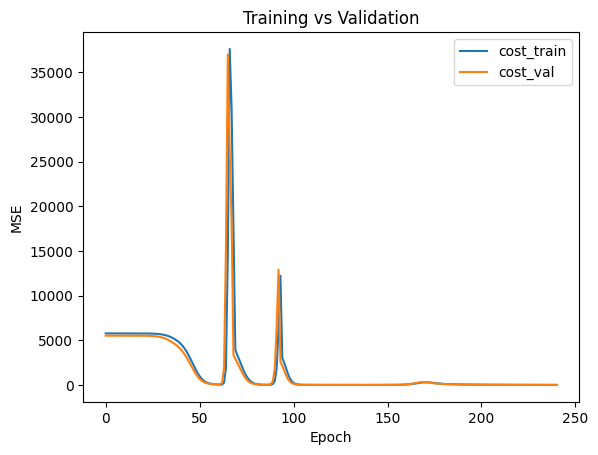

In [206]:
nn = NeuralNetwork(hidden_size=2,alpha=0.0001)
cost_train, cost_val= nn.fit(X_train,Y_train, epochs=10000,activation_func = 'linear', early_stop= True, patience=100)
print(len(cost_val))
#plt.plot(cost)
plt.plot(cost_train, label='cost_train')
plt.plot(cost_val, label = 'cost_val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training vs Validation')
plt.show()


5704


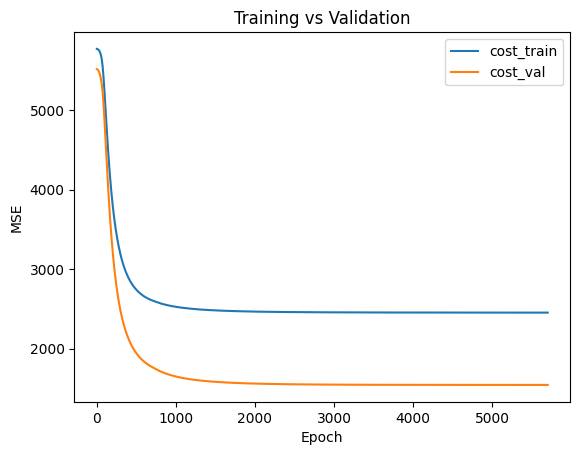

In [207]:
nn = NeuralNetwork(hidden_size=2,alpha=0.0001)
cost_train, cost_val= nn.fit(X_train,Y_train, epochs=10000,activation_func = 'sigmoid', early_stop= True, patience=100)
print(len(cost_val))
#plt.plot(cost)
plt.plot(cost_train, label='cost_train')
plt.plot(cost_val, label = 'cost_val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training vs Validation')
plt.show()


2-9) We chose the L2 regularization and implement it in the fit function.
Lreg = L + lambda/2 (W^2)

We can see that the validation plot had the best accuracy, and stopped at around half of the epochs. So I would choose early_stop over regularization.


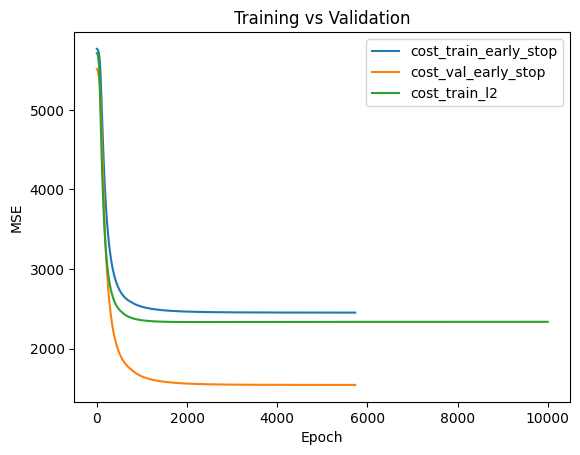

In [208]:
nn = NeuralNetwork(hidden_size=2,alpha=0.0001)
cost_train_early_stop, cost_val_early_stop= nn.fit(X_train,Y_train, epochs=10000,activation_func = 'sigmoid', early_stop= True, patience=100)

nn = NeuralNetwork(hidden_size=2,alpha=0.0001)
cost_train_l2 = nn.fit(X_train,Y_train, epochs=10000,activation_func = 'sigmoid', regularization=True, l=0.01)

plt.plot(cost_train_early_stop, label='cost_train_early_stop')
plt.plot(cost_val_early_stop, label = 'cost_val_early_stop')
plt.plot(cost_train_l2, label='cost_train_l2')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training vs Validation')
plt.show()